Python automation of map plotting

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

Resources
- https://gkhub.earthobservations.org/records/5wg96-bvv84?package=7yjze-2g558

In [2]:
import os
os.chdir(r'd:\git20\GeoPython_Ukraine2024')

In [3]:
gdf_countries = gpd.read_file(r'.\data\Islands_Europe.shp')
gdf_countries = gdf_countries.to_crs('ESRI:54030')
gdf_countries['area'] = gdf_countries.geometry.area
gdf_countries = gdf_countries.sort_values('area', ascending=False)
gdf_countries.head(3)

,OBJECTID_1,Name_USGSO,Plate,USGS_ISID,NEAR_FID,NEAR_DIST,ALL_Uniq,Linework_S,Meaning_AL,ID_GID,...,ChangeRef,Shape_Leng,IslandArea,IslandCoas,Area_Geode,Coast_Geod,Shape_Le_1,Shape_Area,geometry,area
7,2877,Sicily,Africa,318901,226128,0.0,273768,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,239499.0,...,None,1.191976e+06,25498.341449,1191.975839,25454.283083,1190.178528,1.191976e+06,2.549834e+10,"POLYGON ((1364610.770 4095619.343, 1364624.585...",2.438564e+10
6,2873,Sardinia,Eurasia,318897,225976,0.0,273764,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,239347.0,...,None,1.453380e+06,23826.572993,1453.379616,23799.014515,1451.665802,1.453380e+06,2.382657e+10,"POLYGON ((740614.637 4176073.394, 740545.434 4...",2.323869e+10
8,2904,Cyprus,Anatolia,318928,227074,0.0,273795,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,240763.0,...,None,7.537467e+05,9283.519703,753.746689,9262.226924,757.314325,7.537467e+05,9.283520e+09,"POLYGON ((3071979.179 3817772.410, 3071982.627...",8.706992e+09


In [4]:
# Zdefiniowanie nowoczesnej czcionki
nowoczesna_czcionka = {'family': 'Arial', 'weight': 'normal', 'size': 8}

In [5]:
list_islands = gdf_countries.Name_USGSO.unique()[0:8]
list_islands

array(['Sicily', 'Sardinia', 'Cyprus', 'Corsica', 'Crete', 'Euboea',
       'Majorca', 'Tenerife'], dtype=object)

(2774144.3842391847, 3171035.220648179, 3601392.7156016747, 3912895.238373674)

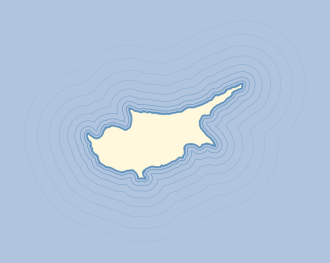

In [23]:
# try out visualisation for a single island
fig, ax = plt.subplots(figsize=(4,4))

gdf_cntr = gdf_countries[gdf_countries.Name_USGSO==list_islands[2]]
gdf_cntr.plot(ax=ax, color='cornsilk', linewidth=0)
alpha = 0.8
lw = 1
range_num = 8

for buf_num in range(0, range_num):
    lw = lw/1.2
    alpha = alpha/1.12 
    gdf_cntr.geometry.buffer(buf_num **2 * 1000).boundary.plot(ax=ax, alpha=alpha, 
                                                    color='steelblue', linewidth=lw)
    
ax.axis('off')

In [28]:
plt.rcParams['figure.facecolor'] = 'lightsteelblue'
fig, axs = plt.subplots(int(len(list_islands)/4), 4, figsize=(12,(len(list_islands)/4)*2))
axs = axs.flatten()


for i in range(0, len(list_islands)):
    try:
        gdf_cntr = gdf_countries[gdf_countries.Name_USGSO==list_islands[i]]
        ax = axs[i]
        alpha = 0.8
        lw = 1
        range_num = 8

        for buf_num in range(0, range_num):
            lw = lw/1.2
            alpha = alpha/1.12
            gdf_cntr.geometry.buffer(buf_num ** 2 * 1000).boundary.plot(ax=ax, alpha=alpha, 
                                                                    color='steelblue', linewidth=lw)

        if i < 1: # calculate dimensions for the first island
            bounds = gdf_cntr.geometry.buffer(50_000).bounds
            cntr_width = bounds.maxx - bounds.minx
            cntr_hight = bounds.maxy - bounds.miny
        
        gdf_cntr.plot(ax=ax, color='cornsilk', linewidth=0)
        
        ax.axis('off')
        ax.set_title(list_islands[i], fontdict=nowoczesna_czcionka)
        ax.set_xlim(gdf_cntr.centroid.x - cntr_width/2, gdf_cntr.centroid.x  + cntr_width/2)
        ax.set_ylim(gdf_cntr.centroid.y - cntr_hight/2, gdf_cntr.centroid.y  + cntr_hight/2)
    except:
        pass
